# Handwritten Digit Recignition
In this notebook, I'll try to code it on a more tensorflow way. I'm not saving the model after the training. So, everytime the kernel restarts, it needs to trained. Feel free to change the hyperparameters, but for me these values feel good enough.

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

### Define the model as subclass of Tensorflow

In [2]:
class DigiRecModel(tf.keras.Model):
    def __init__(self):
        super(DigiRecModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        self.dropout1 = tf.keras.layers.Dropout(0.25)

        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        self.dropout2 = tf.keras.layers.Dropout(0.25)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout3 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs): # Override the tensorflow call function
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.dropout2(x)

        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout3(x)
        return self.dense2(x)

Now, I'm loading the datasets

In [3]:
# Train datasets
train_x = np.loadtxt("Dataset/train_X.csv", delimiter=',')
train_y = np.loadtxt("Dataset/train_label.csv", delimiter=',')

train_x = train_x.reshape(1000, 28, 28, 1) / 255.0

# Test datasets
test_x = np.loadtxt("Dataset/test_X.csv", delimiter=',')
test_y = np.loadtxt("Dataset/test_label.csv", delimiter=',')

test_x = test_x.reshape(350, 28, 28, 1) / 255.0

Setting the hyperparametrs

In [4]:
model = DigiRecModel()
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()
batch_size = 1024
epochs = 100

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(batch_size)

c:\Users\Samiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on the dataset

In [5]:
for epoch in range(epochs):  # Reduced epochs for simplicity
    print(f"Epoch {epoch + 1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            predictions = model(x_batch, training=True)
            loss = loss_fn(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if step % 10 == 0:
            print(f"Step {step}: Loss = {loss.numpy()}")

Epoch 1/100
Step 0: Loss = 2.3178508281707764
Epoch 2/100
Step 0: Loss = 2.241640567779541
Epoch 3/100
Step 0: Loss = 2.1786184310913086
Epoch 4/100
Step 0: Loss = 2.106067419052124
Epoch 5/100
Step 0: Loss = 2.018493175506592
Epoch 6/100
Step 0: Loss = 1.914111614227295
Epoch 7/100
Step 0: Loss = 1.7925931215286255
Epoch 8/100
Step 0: Loss = 1.6577489376068115
Epoch 9/100
Step 0: Loss = 1.5105403661727905
Epoch 10/100
Step 0: Loss = 1.3563337326049805
Epoch 11/100
Step 0: Loss = 1.2025800943374634
Epoch 12/100
Step 0: Loss = 1.0561362504959106
Epoch 13/100
Step 0: Loss = 0.9215712547302246
Epoch 14/100
Step 0: Loss = 0.8036444187164307
Epoch 15/100
Step 0: Loss = 0.7036007046699524
Epoch 16/100
Step 0: Loss = 0.6215906739234924
Epoch 17/100
Step 0: Loss = 0.5556108355522156
Epoch 18/100
Step 0: Loss = 0.5027874112129211
Epoch 19/100
Step 0: Loss = 0.4594978094100952
Epoch 20/100
Step 0: Loss = 0.4238792657852173
Epoch 21/100
Step 0: Loss = 0.39401665329933167
Epoch 22/100
Step 0: Loss

### Evaluation of the model

In [6]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
test_predictions = model(test_x, training=False)
loss = loss_fn(test_y, test_predictions).numpy()
accuracy_metric.update_state(test_y, test_predictions)
accuracy = accuracy_metric.result().numpy()
print(f"Test dataset results \n Loss: {loss} \n Accuracy: {accuracy}")

Test dataset results 
 Loss: 0.31160372495651245 
 Accuracy: 0.9285714030265808


### Demo for the model

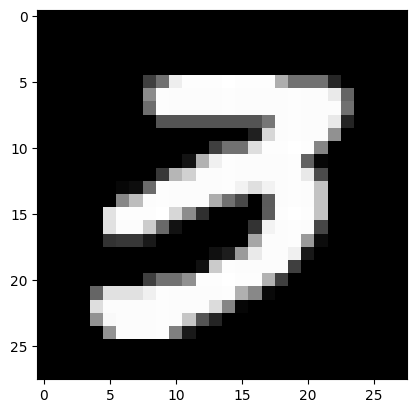

The predicted digit is 3


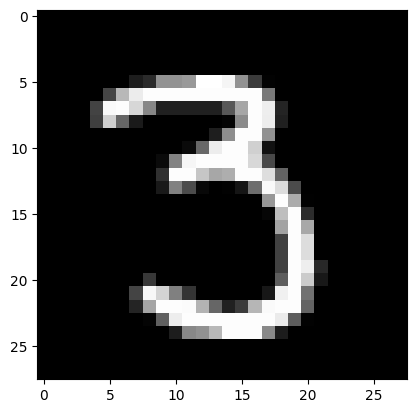

The predicted digit is 3


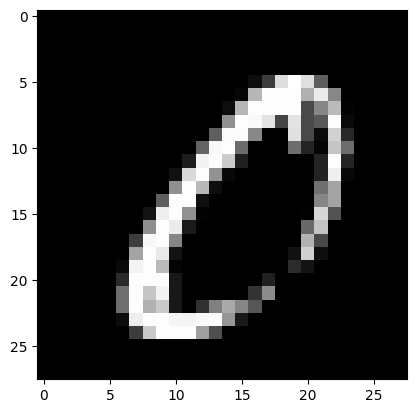

The predicted digit is 0


In [8]:
itr = int(input("How many examples do you want to see? "))
for _ in range(itr):
    index = random.randint(0, len(test_y) - 1)
    plt.imshow(test_x[index].reshape(28, 28), cmap='gray')
    plt.show()

    prediction_y = model(test_x[index:index + 1])
    predicted_value = np.argmax(prediction_y.numpy())
    print("The predicted digit is", predicted_value)